📊 Summary Statistics


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


🧩 Missing Values


Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

🚨 Outlier Counts
GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64


/tmp/ipykernel_174881/543857871.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipykernel_174881/543857871.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

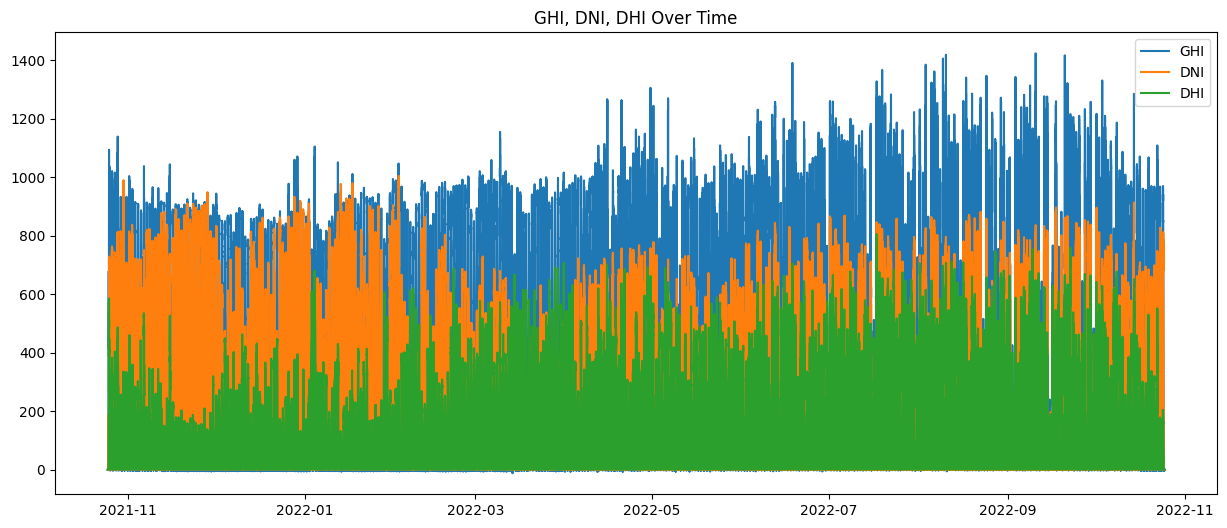

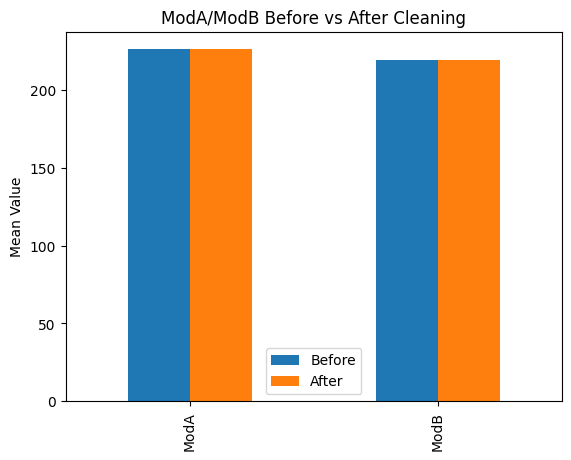

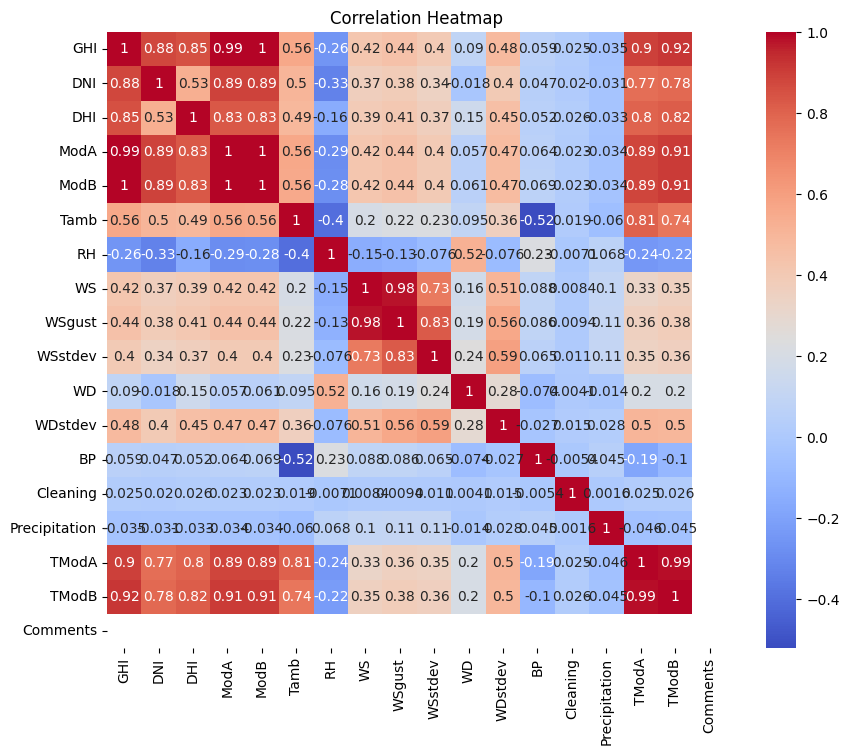

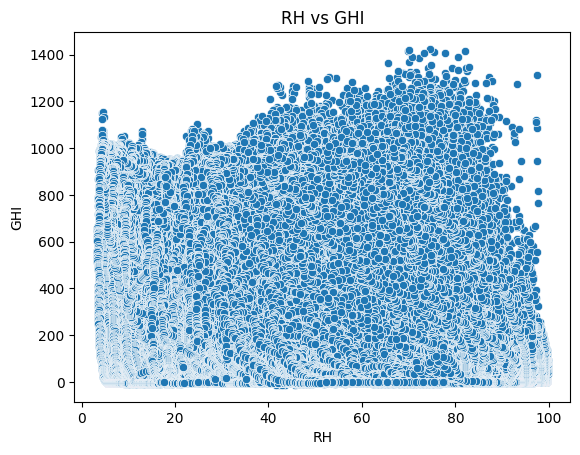

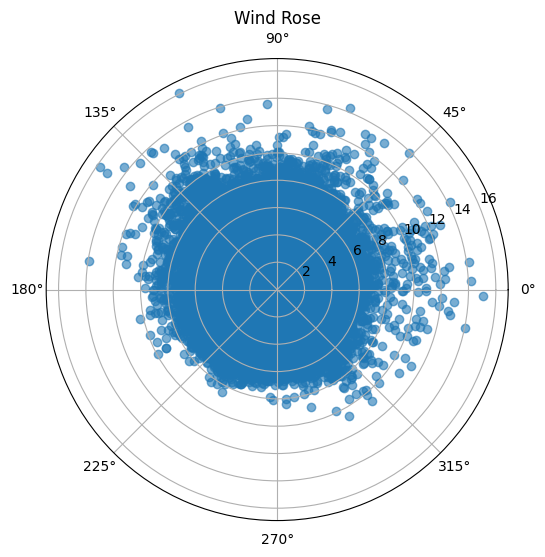

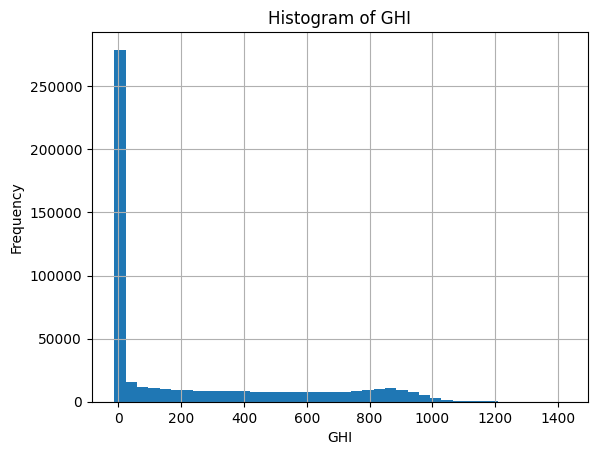

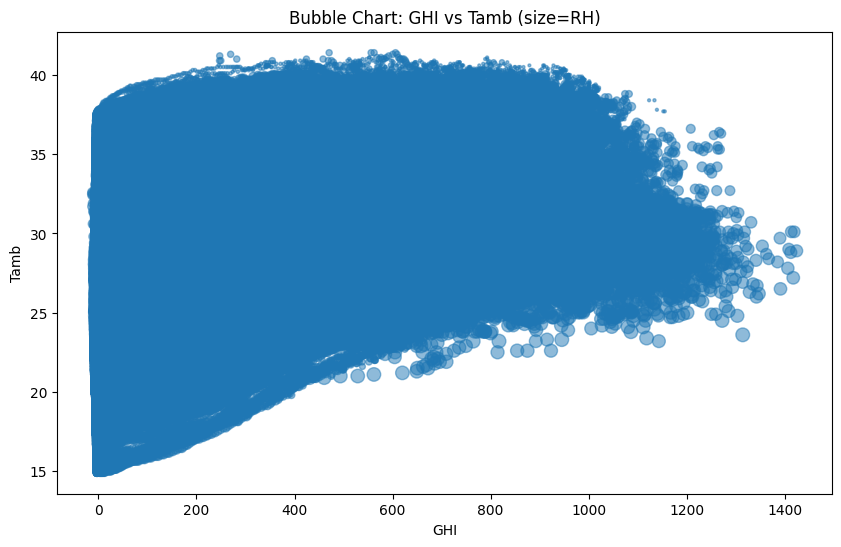

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load data
df = pd.read_csv("togo-dapaong_qc.csv", parse_dates=["Timestamp"])
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Summary statistics
print("📊 Summary Statistics")
display(df.describe(include='all'))

# Missing values report
print("🧩 Missing Values")
display(df.isna().sum().sort_values(ascending=False))

# Z-score Outlier detection
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z = np.abs(zscore(df[cols_to_check].dropna()))
outliers = pd.DataFrame(z > 3, columns=cols_to_check)
print("🚨 Outlier Counts")
print(outliers.sum())

# Impute or drop missing
df_clean = df.dropna(subset=cols_to_check).copy()
for col in cols_to_check:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Export cleaned CSV
df_clean.to_csv("togo_clean.csv", index=False)

# Time series plot
plt.figure(figsize=(15, 6))
for col in ['GHI', 'DNI', 'DHI']:
    plt.plot(df_clean['Timestamp'], df_clean[col], label=col)
plt.legend()
plt.title("GHI, DNI, DHI Over Time")
plt.show()

# ModA/ModB pre/post cleaning
df['ModA_filled'] = df['ModA'].fillna(0)
df['ModB_filled'] = df['ModB'].fillna(0)
means = pd.DataFrame({
    'Before': [df['ModA_filled'].mean(), df['ModB_filled'].mean()],
    'After': [df_clean['ModA'].mean(), df_clean['ModB'].mean()]
}, index=['ModA', 'ModB'])
means.plot(kind='bar', title="ModA/ModB Before vs After Cleaning")
plt.ylabel("Mean Value")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df_clean)
plt.title("RH vs GHI")
plt.show()

# Wind rose (radial)
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)
angles = np.deg2rad(df_clean['WD'])
radii = df_clean['WS']
ax.scatter(angles, radii, alpha=0.6)
ax.set_title("Wind Rose")
plt.show()

# Histogram
df_clean['GHI'].hist(bins=40)
plt.title("Histogram of GHI")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)
plt.title("Bubble Chart: GHI vs Tamb (size=RH)")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.show()
